In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
import tpqoa
import sys


In [56]:
data = pd.read_csv('./data/EUR_USD_D_2006_2024_M.csv', parse_dates = ['time'], usecols = ['time', 'c', 'h', 'l'])
data

,time,h,l,c
0,2006-01-02,1.18390,1.18370,1.18380
1,2006-01-03,1.18440,1.18140,1.18420
2,2006-01-04,1.20380,1.20250,1.20310
3,2006-01-05,1.21220,1.21100,1.21140
4,2006-01-06,1.21140,1.21040,1.21140
...,...,...,...,...
4733,2024-03-25,1.08099,1.08029,1.08030
4734,2024-03-26,1.08388,1.08361,1.08385
4735,2024-03-27,1.08329,1.08286,1.08302
4736,2024-03-28,1.08150,1.08081,1.08138


## Macroeco model

In [57]:
data_eco = data.copy()
print(f"data_eco.shape = {data_eco.shape}")
data_eco.drop(['h', 'l'], axis=1, inplace=True)
data_eu_interest = pd.read_csv('./data/Interest_rate_EUR.csv')
data_ge_interest = pd.read_csv('./data/Interest_rate_Germany.csv')
data_sp500 = pd.read_csv('./data/SP500_Historical_Data.csv', parse_dates = ['Date'])
data_cpi = pd.read_csv('./data/CPI-U_Inflation_US.csv')
data_dff = pd.read_csv('./data/DFF.csv')
data_gdaxi = pd.read_csv('./data/GDAXI.csv')
data_hcip = pd.read_csv('./data/HCIP_Inflation_EUR.csv')


data_eco.shape = (4738, 4)


In [58]:
data_eco['year_month'] = data_eco['time'].dt.strftime('%Y-%m')
data_eco

,time,c,year_month
0,2006-01-02,1.18380,2006-01
1,2006-01-03,1.18420,2006-01
2,2006-01-04,1.20310,2006-01
3,2006-01-05,1.21140,2006-01
4,2006-01-06,1.21140,2006-01
...,...,...,...
4733,2024-03-25,1.08030,2024-03
4734,2024-03-26,1.08385,2024-03
4735,2024-03-27,1.08302,2024-03
4736,2024-03-28,1.08138,2024-03


In [59]:
# Merge with data_eu_interest
print(f"data_eco.shape = {data_eco.shape}")
data_eu_interest['DATE'] = pd.to_datetime(data_eu_interest['DATE'], format="%Y-%m-%d").dt.strftime("%Y-%m")
data_eco = pd.merge(data_eco, data_eu_interest, left_on='year_month', right_on='DATE', how='left')
data_eco.drop(['DATE', 'TIME PERIOD'], axis=1, inplace=True)
data_eco

data_eco.shape = (4738, 3)


,time,c,year_month,interest_rate_eu
0,2006-01-02,1.18380,2006-01,3.38
1,2006-01-03,1.18420,2006-01,3.38
2,2006-01-04,1.20310,2006-01,3.38
3,2006-01-05,1.21140,2006-01,3.38
4,2006-01-06,1.21140,2006-01,3.38
...,...,...,...,...
4733,2024-03-25,1.08030,2024-03,2.90
4734,2024-03-26,1.08385,2024-03,2.90
4735,2024-03-27,1.08302,2024-03,2.90
4736,2024-03-28,1.08138,2024-03,2.90


In [60]:
# Merge with data_ge_interest
print(f"data_eco.shape = {data_eco.shape}")
data_ge_interest['DATE'] = pd.to_datetime(data_ge_interest['DATE'], format="%Y-%m-%d").dt.strftime("%Y-%m")
data_eco = pd.merge(data_eco, data_ge_interest, left_on='year_month', right_on='DATE', how='left')
data_eco.drop(['DATE', 'TIME PERIOD'], axis=1, inplace=True)
data_eco

data_eco.shape = (4738, 4)


,time,c,year_month,interest_rate_eu,interest_rate_ge
0,2006-01-02,1.18380,2006-01,3.38,3.32
1,2006-01-03,1.18420,2006-01,3.38,3.32
2,2006-01-04,1.20310,2006-01,3.38,3.32
3,2006-01-05,1.21140,2006-01,3.38,3.32
4,2006-01-06,1.21140,2006-01,3.38,3.32
...,...,...,...,...,...
4733,2024-03-25,1.08030,2024-03,2.90,2.35
4734,2024-03-26,1.08385,2024-03,2.90,2.35
4735,2024-03-27,1.08302,2024-03,2.90,2.35
4736,2024-03-28,1.08138,2024-03,2.90,2.35


In [61]:
# Merge with data_sp500
print(f"data_eco.shape = {data_eco.shape}")
data_eco = pd.merge(data_eco, data_sp500[['Date', 'Adj Close']], left_on='time', right_on='Date', how='left')
data_eco.drop(['Date'], axis=1, inplace=True)
data_eco['Adj Close'].interpolate(method='linear', inplace=True)
data_eco['Adj Close'].bfill(inplace=True) # fill the first value
data_eco.rename(columns= {'Adj Close' : 'sp500'}, inplace=True)
data_eco

data_eco.shape = (4738, 5)


,time,c,year_month,interest_rate_eu,interest_rate_ge,sp500
0,2006-01-02,1.18380,2006-01,3.38,3.32,1268.800049
1,2006-01-03,1.18420,2006-01,3.38,3.32,1268.800049
2,2006-01-04,1.20310,2006-01,3.38,3.32,1273.459961
3,2006-01-05,1.21140,2006-01,3.38,3.32,1273.479980
4,2006-01-06,1.21140,2006-01,3.38,3.32,1285.449951
...,...,...,...,...,...,...
4733,2024-03-25,1.08030,2024-03,2.90,2.35,5218.189941
4734,2024-03-26,1.08385,2024-03,2.90,2.35,5203.580078
4735,2024-03-27,1.08302,2024-03,2.90,2.35,5248.490234
4736,2024-03-28,1.08138,2024-03,2.90,2.35,5254.350098


In [62]:
# Merge with data_cpi
data_cpi = data_cpi[~data_cpi['Period'].isin(['S01', 'S02'])]
data_cpi['year_month'] = data_cpi['Year'].astype(str) + '-' + pd.to_datetime(data_cpi['Period'], format="M%m").dt.strftime('%m')
data_eco = pd.merge(data_eco, data_cpi[['year_month', 'Value']], left_on='year_month', right_on='year_month', how='left')
data_eco.rename(columns= {'Value' : 'cpi-u'}, inplace=True)

In [63]:
# Merge with data_dff
data_dff['DATE'] = pd.to_datetime(data_dff['DATE'], format='%Y-%m-%d')
data_eco = pd.merge(data_eco, data_dff[['DATE', 'DFF']], left_on='time', right_on='DATE', how='left')
data_eco.rename(columns= {'Value' : 'cpi-u'}, inplace=True)
data_eco.drop(['DATE'], axis=1, inplace=True)


In [64]:
# Merge with data_gdaxi
data_gdaxi['Date'] = pd.to_datetime(data_gdaxi['Date'], format='%Y-%m-%d')
data_eco = pd.merge(data_eco, data_gdaxi[['Date', 'Adj Close']], left_on='time', right_on='Date', how='left')
data_eco.rename(columns= {'Adj Close' : 'gdaxi'}, inplace=True)
data_eco.drop(['Date'], axis=1, inplace=True)
data_eco['gdaxi'].interpolate(method='linear', inplace=True)


In [65]:
# Merge with data_hcip
data_hcip['DATE'] = pd.to_datetime(data_hcip['DATE'], format="%Y-%m-%d").dt.strftime("%Y-%m")
data_eco = pd.merge(data_eco, data_hcip, left_on='year_month', right_on='DATE', how='left')
data_eco.drop(['DATE', 'TIME PERIOD'], axis=1, inplace=True)
data_eco

,time,c,year_month,interest_rate_eu,interest_rate_ge,sp500,cpi-u,DFF,gdaxi,hcip
0,2006-01-02,1.18380,2006-01,3.38,3.32,1268.800049,2.1,4.09,5449.979980,2.4
1,2006-01-03,1.18420,2006-01,3.38,3.32,1268.800049,2.1,4.34,5460.680176,2.4
2,2006-01-04,1.20310,2006-01,3.38,3.32,1273.459961,2.1,4.22,5523.620117,2.4
3,2006-01-05,1.21140,2006-01,3.38,3.32,1273.479980,2.1,4.24,5516.529785,2.4
4,2006-01-06,1.21140,2006-01,3.38,3.32,1285.449951,2.1,4.22,5536.319824,2.4
...,...,...,...,...,...,...,...,...,...,...
4733,2024-03-25,1.08030,2024-03,2.90,2.35,5218.189941,3.8,5.33,18261.310547,2.4
4734,2024-03-26,1.08385,2024-03,2.90,2.35,5203.580078,3.8,5.33,18384.349609,2.4
4735,2024-03-27,1.08302,2024-03,2.90,2.35,5248.490234,3.8,5.33,18477.089844,2.4
4736,2024-03-28,1.08138,2024-03,2.90,2.35,5254.350098,3.8,5.33,18492.490234,2.4


In [66]:
# Drop the first 26 rows to match with data_tech
data_eco = data_eco.iloc[26:]
print(data_eco.shape)
print(data_eco)
print(data_eco.isna().sum())

(4712, 10)
           time        c year_month  interest_rate_eu  interest_rate_ge  \
26   2006-02-07  1.19646    2006-02              3.53              3.47   
27   2006-02-08  1.19816    2006-02              3.53              3.47   
28   2006-02-09  1.19626    2006-02              3.53              3.47   
29   2006-02-10  1.19840    2006-02              3.53              3.47   
30   2006-02-13  1.18960    2006-02              3.53              3.47   
...         ...      ...        ...               ...               ...   
4733 2024-03-25  1.08030    2024-03              2.90              2.35   
4734 2024-03-26  1.08385    2024-03              2.90              2.35   
4735 2024-03-27  1.08302    2024-03              2.90              2.35   
4736 2024-03-28  1.08138    2024-03              2.90              2.35   
4737 2024-03-29  1.07866    2024-03              2.90              2.35   

            sp500  cpi-u   DFF         gdaxi  hcip  
26    1254.780029    2.1  4.47   56

## Technical Model

In [67]:
data

,time,h,l,c
0,2006-01-02,1.18390,1.18370,1.18380
1,2006-01-03,1.18440,1.18140,1.18420
2,2006-01-04,1.20380,1.20250,1.20310
3,2006-01-05,1.21220,1.21100,1.21140
4,2006-01-06,1.21140,1.21040,1.21140
...,...,...,...,...
4733,2024-03-25,1.08099,1.08029,1.08030
4734,2024-03-26,1.08388,1.08361,1.08385
4735,2024-03-27,1.08329,1.08286,1.08302
4736,2024-03-28,1.08150,1.08081,1.08138


In [68]:
data_tech = data.copy()
print(f"data_tech.shape = {data_tech.shape}")

# Calculate Moving Average (MA) with a period of 10
data_tech['MA_10'] = ta.sma(data_tech['c'], length=10)

# Calculate Moving Average Convergence Divergence (MACD) with short- and long-term periods of 12 and 26, respectively
data_tech['MACD_12_26'] = ta.macd(data_tech['c'], fast=12, slow=26).iloc[:, 0]

# Calculate Rate of Change (ROC) with a period of 2
data_tech['ROC_2'] = ta.roc(data_tech['c'], length=2)

# Calculate Momentum with a period of 4
data_tech['Momentum_4'] = ta.mom(data_tech['c'], length=4)

# Calculate Relative Strength Index (RSI) with a period of 10
data_tech['RSI_10'] = ta.rsi(data_tech['c'], length=10)

# Calculate Bollinger Bands (BB) with a period of 20 using 'c' column
# data_tech['BB_upper'], data_tech['BB_lower'], _ = ta.bbands(data_tech['c'], length=20)
# Calculate Bollinger Bands (BB) with a period of 20 using 'c' column
bb_data = ta.bbands(data_tech['c'], length=20)

# Merge BB data into the original DataFrame
data_tech = pd.concat([data_tech, bb_data], axis=1)

# Calculate Commodity Channel Index (CCI) with a period of 20 using 'h', 'l', and 'c' columns
data_tech['CCI_20'] = ta.cci(data_tech['h'], data_tech['l'], data_tech['c'], length=20)

# Print the DataFrame with added technical indicators
data_tech = data_tech.iloc[26:]
print(data_tech.isna().sum())
data_tech

data_tech.shape = (4738, 4)
time          0
h             0
l             0
c             0
MA_10         0
MACD_12_26    0
ROC_2         0
Momentum_4    0
RSI_10        0
BBL_20_2.0    0
BBM_20_2.0    0
BBU_20_2.0    0
BBB_20_2.0    0
BBP_20_2.0    0
CCI_20        0
dtype: int64


,time,h,l,c,MA_10,MACD_12_26,ROC_2,Momentum_4,RSI_10,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,CCI_20
26,2006-02-07,1.19666,1.19596,1.19646,1.212396,-0.000074,-1.045406,-0.01834,36.217972,1.196244,1.212436,1.228628,2.671004,0.006673,-165.533230
27,2006-02-08,1.19936,1.19806,1.19816,1.209542,-0.000946,-0.485050,-0.00964,38.532998,1.194933,1.212059,1.229185,2.825944,0.094215,-133.416803
28,2006-02-09,1.19650,1.19600,1.19626,1.206658,-0.001769,-0.016716,-0.01284,36.871095,1.192758,1.211187,1.229616,3.043199,0.095022,-137.805786
29,2006-02-10,1.20136,1.19776,1.19840,1.204328,-0.002223,0.020031,-0.00560,40.103967,1.191852,1.210892,1.229932,3.144742,0.171949,-105.776085
30,2006-02-13,1.19030,1.18900,1.18960,1.202308,-0.003255,-0.556735,-0.00686,32.499577,1.188575,1.209562,1.230549,3.470244,0.024428,-167.999552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4733,2024-03-25,1.08099,1.08029,1.08030,1.089076,0.000777,-1.178214,-0.00694,38.811259,1.078868,1.087952,1.097036,1.669874,0.078807,-128.014550
4734,2024-03-26,1.08388,1.08361,1.08385,1.088139,0.000427,-0.253083,-0.00212,45.143745,1.078728,1.087897,1.097066,1.685578,0.279303,-70.215176
4735,2024-03-27,1.08329,1.08286,1.08302,1.087145,0.000082,0.251782,-0.01016,43.961831,1.078553,1.087835,1.097117,1.706560,0.240635,-80.347630
4736,2024-03-28,1.08150,1.08081,1.08138,1.085791,-0.000320,-0.227891,-0.00522,41.572286,1.078171,1.087716,1.097261,1.755144,0.168116,-105.605063


## Determine threshold

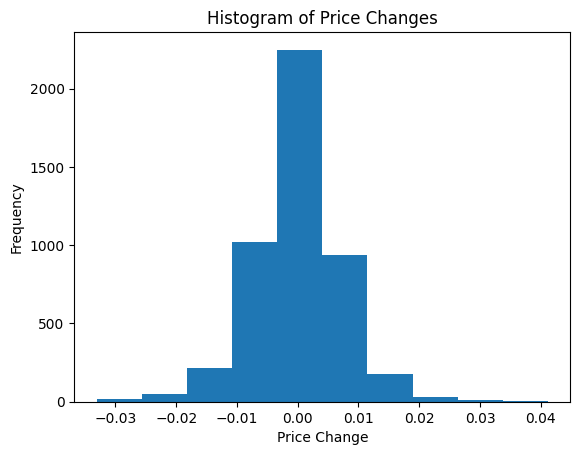

In [69]:
# Calculate price changes
price_changes = np.diff(data_eco['c'])

# Perform histogram analysis
histogram, bins = np.histogram(price_changes, bins=10)

# Plot histogram
plt.bar(bins[:-1], histogram, width=np.diff(bins), align='edge')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.title('Histogram of Price Changes')
plt.show()

In [70]:
price_changes

array([ 0.0017 , -0.0019 ,  0.00214, ..., -0.00083, -0.00164, -0.00272])

In [71]:
import numpy as np

# Determine number of bins
number_of_bins = 10

# Calculate histogram
histogram, bins = np.histogram(price_changes, bins=number_of_bins, range=(0, price_changes.max()))

# Sort histogram counts in descending order
sorted_histogram = np.sort(histogram)[::-1]

# Calculate cumulative sum of sorted histogram counts
cumulative_sum = np.cumsum(sorted_histogram)

# Find the index where cumulative sum exceeds 85% of the whole count
index_85_percent = np.argmax(cumulative_sum >= len(price_changes) * 0.85)

# Calculate the upper bound of the threshold value
if index_85_percent == 0:
    threshold_upper_bound = bins[-1]
else:
    threshold_upper_bound = bins[index_85_percent]

print("Upper bound of the threshold value:", threshold_upper_bound)

Upper bound of the threshold value: 0.04116999999999993


In [72]:
# procdeure histogram_analysis(close_dif f[], number_of_bins)           close(t) - close(t-k)
#     bin_counts[], bin_max_dif f[]  <-- perform histogram (close_dif f[], number_of_bins)
#                          bin_counts, bin_max_dif are reverse sorted arrays according to bin_counts value
#     temp_sum <-- 0
#     sum_bin_counts <-- sum(bin_counts[])
#     i <-- 1
#     while i <= number_of_bins do
#         temp_sum <-- temp_sum + bin_counts[i]
#         if (temp_sum / sum_bin_counts > 0.85) then
#                break
#         i <-- i + 1
#     threshold_upper_bond <-- bin_max_dif f[i]
# return threshold_upper_bond 

In [73]:
bin_counts, bin_edges = np.histogram(price_changes, bins=number_of_bins)
print(bin_counts)
print(bin_edges)
bin_max_diff = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_counts))]
print(bin_max_diff)

[  17   49  213 1022 2249  939  177   28   14    3]
[-0.03304  -0.025619 -0.018198 -0.010777 -0.003356  0.004065  0.011486
  0.018907  0.026328  0.033749  0.04117 ]
[-0.029329500000000175, -0.021908500000000164, -0.014487500000000153, -0.007066500000000142, 0.0003544999999998688, 0.00777549999999988, 0.01519649999999989, 0.0226174999999999, 0.030038499999999912, 0.03745949999999992]


In [74]:
import numpy as np

def histogram_analysis(close_diff, number_of_bins):
    # Perform histogram analysis
    bin_counts, bin_edges = np.histogram(close_diff, bins=number_of_bins)
    bin_max_diff = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_counts))]

    # Sort bin_counts and bin_max_diff in descending order
    sorted_indices = np.argsort(bin_counts)[::-1]
    bin_counts = bin_counts[sorted_indices]
    bin_max_diff = [bin_max_diff[i] for i in sorted_indices]

    # Calculate sum of bin_counts
    sum_bin_counts = np.sum(bin_counts)

    # Find the threshold upper bound
    temp_sum = 0
    for i in range(number_of_bins):
        temp_sum += bin_counts[i]
        if temp_sum / sum_bin_counts > 0.85:
            break

    threshold_upper_bound = bin_max_diff[i]

    return threshold_upper_bound

# Example usage
# close_diff = np.random.uniform(low=-0.01, high=0.01, size=1000)  # Example differences data
number_of_bins = 10  # Example number of bins
threshold_upper_bound = histogram_analysis(price_changes, number_of_bins)
print("Threshold upper bound:", threshold_upper_bound)


Threshold upper bound: 0.00777549999999988


In [75]:
# procedur calculate_threshold (close_dif f[])
#      threshold_upper_bound <-- histogram_analysis(close_dif f[], 10)
#      temp_threshold <-- 0
#      best_entropy = -Infinity
#      while temp_threshold < threshold_upper_bound do
#             labels <-- {0}
#             indexes_incr <-- indexO f(close_dif f[] > temp_threshold)
#             indexes_decr <-- indexO f(-close_dif f[] > temp_threshold )
#             labels {indexes_incr} <-- 2
#             labels {indexes_decr} <-- 1
#             entropy <-- calculate_entropy(labels[])
#             if entropy > best_entropy then
#                   best_entropy <-- entropy
#                   threshold <-- temp_threshold 
#             temp_threshold <-- temp_threshold + 0.00001
# return threshold

In [76]:
import numpy as np

def calculate_threshold(close_diff):
    # Get the upper bound of the threshold value from histogram analysis
    threshold_upper_bound = histogram_analysis(close_diff, number_of_bins)
    
    temp_threshold = 0
    best_entropy = -float('inf')
    threshold = None
    
    while temp_threshold < threshold_upper_bound:
        labels = np.zeros(len(close_diff))  # Initialize labels with zeros
        
        # Assign labels based on threshold
        indexes_incr = np.where(close_diff > temp_threshold)[0]
        indexes_decr = np.where(-close_diff > temp_threshold)[0]
        labels[indexes_incr] = 2
        labels[indexes_decr] = 1
        
        # Calculate entropy
        entropy = calculate_entropy(labels)
        
        # Update best_entropy and threshold if current entropy is better
        if entropy > best_entropy:
            best_entropy = entropy
            threshold = temp_threshold
        
        # Increase temp_threshold for next iteration
        temp_threshold += 0.00001
    
    return threshold

# Function to calculate entropy
def calculate_entropy(labels):
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    probabilities = label_counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Example usage
threshold = calculate_threshold(price_changes)
print("Final threshold:", threshold)


Final threshold: 0.0024400000000000055


In [77]:
data_eco['price_diff'] = data_eco['c'].diff()
data_eco['price_diff'] = data_eco['price_diff'].bfill()
data_eco['target'] = 0
data_eco.loc[data_eco['price_diff'] > threshold, 'target'] = 2
data_eco.loc[data_eco['price_diff'] < -threshold, 'target'] = 1
data_eco['target'] = data_eco['target'].shift(-1)
data_eco['target'].fillna(0, inplace=True)
data_eco.set_index('time', inplace=True)
data_eco.drop(['year_month', 'price_diff'], axis=1, inplace=True)
data_eco
# target_counts = data_eco['target'].value_counts()
# print(target_counts)

/tmp/ipykernel_332141/3185482713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eco['price_diff'] = data_eco['c'].diff()
/tmp/ipykernel_332141/3185482713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eco['price_diff'] = data_eco['price_diff'].bfill()
/tmp/ipykernel_332141/3185482713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,c,interest_rate_eu,interest_rate_ge,sp500,cpi-u,DFF,gdaxi,hcip,target
time,,,,,,,,,
2006-02-07,1.19646,3.53,3.47,1254.780029,2.1,4.47,5672.919922,2.4,0.0
2006-02-08,1.19816,3.53,3.47,1265.650024,2.1,4.48,5666.410156,2.4,0.0
2006-02-09,1.19626,3.53,3.47,1263.780029,2.1,4.52,5743.680176,2.4,0.0
2006-02-10,1.19840,3.53,3.47,1266.989990,2.1,4.51,5701.470215,2.4,1.0
2006-02-13,1.18960,3.53,3.47,1262.859985,2.1,4.44,5756.330078,2.4,0.0
...,...,...,...,...,...,...,...,...,...
2024-03-25,1.08030,2.90,2.35,5218.189941,3.8,5.33,18261.310547,2.4,2.0
2024-03-26,1.08385,2.90,2.35,5203.580078,3.8,5.33,18384.349609,2.4,0.0
2024-03-27,1.08302,2.90,2.35,5248.490234,3.8,5.33,18477.089844,2.4,0.0


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_eco.drop(columns=['target'])
y = data_eco['target']

# Split the dataset into training and testing sets with 80/20 ratio and no shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# scaler = StandardScaler()
# # Fit the scaler to the training data and transform it
# X_train_normalized = scaler.fit_transform(X_train)

# # Transform the testing data using the scaler fitted on the training data
# X_test_normalized = scaler.transform(X_test)

# X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
# X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)


In [79]:
from keras.metrics import Metric
import keras.backend as K

class ProfitAccuracy(Metric):
    def __init__(self, **kwargs):
        super(ProfitAccuracy, self).__init__(**kwargs)
        self.true_dec = self.add_weight(name='true_dec', initializer='zeros')
        self.true_inc = self.add_weight(name='true_inc', initializer='zeros')
        self.false_dec_noact = self.add_weight(name='false_dec_noact', initializer='zeros')
        self.false_inc_noact = self.add_weight(name='false_inc_noact', initializer='zeros')
        self.false_inc_dec = self.add_weight(name='false_inc_dec', initializer='zeros')
        self.false_dec_inc = self.add_weight(name='false_dec_inc', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert y_true and y_pred to boolean arrays
        y_true = K.argmax(y_true, axis=-1)
        y_pred = K.argmax(y_pred, axis=-1)

        # true_dec = K.sum(K.cast(K.equal(y_true, 0) & K.equal(y_pred, 2), 'float32'))
        # true_inc = K.sum(K.cast(K.equal(y_true, 2) & K.equal(y_pred, 0), 'float32'))
        # false_dec_noact = K.sum(K.cast(K.equal(y_true, 0) & K.equal(y_pred, 0), 'float32'))
        # false_inc_noact = K.sum(K.cast(K.equal(y_true, 2) & K.equal(y_pred, 2), 'float32'))
        # false_inc_dec = K.sum(K.cast(K.equal(y_true, 0) & K.equal(y_pred, 2), 'float32'))
        # false_dec_inc = K.sum(K.cast(K.equal(y_true, 2) & K.equal(y_pred, 0), 'float32'))
        
        true_dec = K.sum(K.cast(K.equal(y_true, 1) & K.equal(y_pred, 1), 'float32'))
        true_inc = K.sum(K.cast(K.equal(y_true, 2) & K.equal(y_pred, 2), 'float32'))
        false_dec_noact = K.sum(K.cast(K.equal(y_true, 0) & K.equal(y_pred, 1), 'float32'))
        false_inc_noact = K.sum(K.cast(K.equal(y_true, 0) & K.equal(y_pred, 2), 'float32'))
        false_inc_dec = K.sum(K.cast(K.equal(y_true, 1) & K.equal(y_pred, 2), 'float32'))
        false_dec_inc = K.sum(K.cast(K.equal(y_true, 2) & K.equal(y_pred, 1), 'float32'))


        self.true_dec.assign_add(true_dec)
        self.true_inc.assign_add(true_inc)
        self.false_dec_noact.assign_add(false_dec_noact)
        self.false_inc_noact.assign_add(false_inc_noact)
        self.false_inc_dec.assign_add(false_inc_dec)
        self.false_dec_inc.assign_add(false_dec_inc)

    def result(self):
        numerator = self.true_dec + self.true_inc
        denominator = (
            self.false_dec_noact + self.false_inc_noact +
            self.true_dec + self.false_inc_dec +
            self.false_dec_inc + self.true_inc
        )

        return numerator / denominator

    def reset_state(self):
        self.true_dec.assign(0)
        self.true_inc.assign(0)
        self.false_dec_noact.assign(0)
        self.false_inc_noact.assign(0)
        self.false_inc_dec.assign(0)
        self.false_dec_inc.assign(0)


In [80]:
# X_train_normalized

In [54]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming X_train, X_test, y_train, y_test are obtained from train_test_split

# Remove timestamp column from features
# X_train = X_train.drop(columns=['time'])
# X_test = X_test.drop(columns=['time'])
X_train = X_train.astype('float32')
y_train = y_train.astype('int32')
X_train = X_train
X_test = X_test
# Convert labels to one-hot encoding
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)
y_train_onehot = to_categorical(encoded_y_train)
y_test_onehot = to_categorical(encoded_y_test)

# Reshape input data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(150, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(3, activation='relu'))  # Assuming you have 3 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[ProfitAccuracy()])

# Train the model
model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, validation_data=(X_test, y_test_onehot))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print("Test Accuracy:", accuracy)


Epoch 1/50


118/118 [==============================] - 3s 11ms/step - loss: 5.9600 - profit_accuracy_1: 0.3547 - val_loss: 5.3047 - val_profit_accuracy_1: 0.2759
Epoch 2/50
118/118 [==============================] - 1s 5ms/step - loss: 5.9224 - profit_accuracy_1: 0.3456 - val_loss: 5.3122 - val_profit_accuracy_1: 0.2894
Epoch 3/50
118/118 [==============================] - 1s 7ms/step - loss: 5.9237 - profit_accuracy_1: 0.3484 - val_loss: 5.3171 - val_profit_accuracy_1: 0.2901
Epoch 4/50
118/118 [==============================] - 1s 6ms/step - loss: 5.9228 - profit_accuracy_1: 0.3522 - val_loss: 5.3033 - val_profit_accuracy_1: 0.2742
Epoch 5/50
118/118 [==============================] - 1s 6ms/step - loss: 5.9243 - profit_accuracy_1: 0.3481 - val_loss: 5.3219 - val_profit_accuracy_1: 0.2901
Epoch 6/50
118/118 [==============================] - 1s 6ms/step - loss: 5.9240 - profit_accuracy_1: 0.3454 - val_loss: 5.3120 - val_profit_accuracy_1: 0.2901
Epoch 7/50
118/118 [==============================